In [11]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [13]:
df = pd.read_csv('Traffic_violations_sample.csv')

In [6]:
df.shape

(158175, 35)

In [7]:
df.head()

,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Date Of Stop_format
0,21:53:00,MCP,"6th District, Gaithersburg / Montgomery Village",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,WOODFIELD RD @ SNOUFFER SCHOOL RD,39.159715,-77.159718,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,FORD,TK,WHITE,Citation,16-303(g),Transportation Article,False,BLACK,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1597147833333, -77.1597180833333)",2012-07-26
1,16:22:00,MCP,"3rd District, Silver Spring",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WB FLOWER AVE @ PINEY BRANCH RD,38.998877,-77.003820,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2006.0,FORD,CROWN VICTORIA,"BLUE, LIGHT",Warning,21-201(a1),Transportation Article,False,BLACK,M,WASHINGTON,DC,DC,A - Marked Patrol,"(38.9988771833333, -77.00381955)",2012-01-09
2,12:04:00,MCP,"5th District, Germantown",EXCEEDING MAXIMUM SPEED: 49 MPH IN A POSTED 40...,FREDERICK RD @ PLUMMER DR,39.171525,-77.236339,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2004.0,TOYT,CAMRY,BLUE,Citation,21-801.1,Transportation Article,False,WHITE,F,GAITHERSBURG,MD,MD,Q - Marked Laser,"(39.1715247, -77.2363386833333)",2012-02-14
3,20:05:00,MCP,"3rd District, Silver Spring",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,COLESVILLE RD/WAYNE AVE,38.993956,-77.029728,No,No,No,No,No,No,No,No,No,No,MD,05 - Light Duty Truck,2001.0,HOND,TK,BLUE,Warning,21-201(a1),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9939555333333, -77.0297278666667)",2012-08-07
4,14:17:00,MCP,"2nd District, Bethesda",DRIVING MOTOR VEH. WHILE LIC. SUSPENDED UNDER ...,270 N/B /MONTROSE RD,39.247944,-77.233987,No,No,No,No,No,No,No,No,No,No,MD,28 - Other,2002.0,CHEVY,TAHOE,BLUE,Citation,16-303(h),Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.24794435, -77.2339871833333)",2012-09-21


### Data Info Table

In [9]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.nunique()).T.rename(index={0:'Unique values'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values percent'}))
tab_info.T

,column type,Unique values,null values,null values percent
Time Of Stop,object,1440,0,0
Agency,object,1,0,0
SubAgency,object,8,0,0
Description,object,3911,0,0
Location,object,67021,0,0
Latitude,float64,94237,0,0
Longitude,float64,100598,0,0
Accident,object,2,0,0
Belts,object,2,0,0
Personal Injury,object,2,0,0


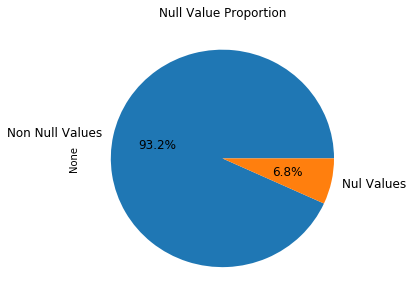

In [91]:
## Null Value percentage
null_per=pd.Series({'Not Null %':(100-tab_info.loc['null values percent'].sum()),'Null value %':tab_info.loc['null values percent'].sum()})
ax = null_per.plot.pie(autopct='%.1f%%', labels = ['Non Null Values', 'Nul Values'],figsize =(5,5), fontsize = 12 )
ax.set_title('Null Value Proportion', fontsize = 12)
plt.show()

## EDA is Performed in Tableau 

In [ ]:
## Droping the Unique Features and multi categorical features

In [14]:
data=df.drop(['Agency','Description','Location','Latitude','Longitude','State','Year','Make','Model','Color','Charge',
              'Article','Location','Driver City','Driver State','DL State','Arrest Type','Geolocation'],1)

In [15]:
data.head()

,Time Of Stop,SubAgency,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,VehicleType,Violation Type,Contributed To Accident,Race,Gender,Date Of Stop_format
0,21:53:00,"6th District, Gaithersburg / Montgomery Village",No,No,No,No,No,No,No,No,No,No,02 - Automobile,Citation,False,BLACK,F,2012-07-26
1,16:22:00,"3rd District, Silver Spring",No,No,No,No,No,No,No,No,No,No,02 - Automobile,Warning,False,BLACK,M,2012-01-09
2,12:04:00,"5th District, Germantown",No,No,No,No,No,No,No,No,No,No,02 - Automobile,Citation,False,WHITE,F,2012-02-14
3,20:05:00,"3rd District, Silver Spring",No,No,No,No,No,No,No,No,No,No,05 - Light Duty Truck,Warning,False,BLACK,F,2012-08-07
4,14:17:00,"2nd District, Bethesda",No,No,No,No,No,No,No,No,No,No,28 - Other,Citation,False,BLACK,M,2012-09-21


In [16]:
data['Violation Type'].value_counts()

Warning     79279
Citation    71191
ESERO        7619
SERO           86
Name: Violation Type, dtype: int64

## Encoding of Categorical Variables

In [17]:
data=data.replace({'No':0,'Yes':1})

In [18]:
data['Violation Type']=data['Violation Type'].map({'Citation':0,'ESERO':1,'Warning':2,'SERO':3})
data['Race']=data['Race'].map({'ASIAN':0,'BLACK':1,'HISPANIC':2,'NATIVE AMERICAN':3,'OTHER':4,'WHITE':5})
data['Gender']=data['Gender'].map({'F':0,'M':1,'U':2})
data['Contributed To Accident']=data['Contributed To Accident'].map({False:0,True:1})

In [19]:
data['SubAgency']=data['SubAgency'].map({'Headquarters and Special Operations':0,
                                         '1st District, Rockville':1,'2nd District, Bethesda':2,
                                        '3rd District, Silver Spring':3,'4th District, Wheaton':4,
                                        '5th District, Germantown':5,'6th District, Gaithersburg / Montgomery Village':6,
                                        'W15':7})

In [20]:
data.loc[:,'Date Of Stop_format'] = pd.to_datetime(data['Date Of Stop_format'].astype(str)+' '+data['Time Of Stop'].astype(str))

In [21]:
data.drop('Time Of Stop',1,inplace=True)

In [22]:
le=LabelEncoder()

In [23]:
data['VehicleType']=le.fit_transform(data['VehicleType'])

### Feature Extraction(month,Year,hour of violation datetime)

In [24]:
data['year_vio']=data['Date Of Stop_format'].dt.year
data['month_vio']=data['Date Of Stop_format'].dt.month
data['day_vio']=data['Date Of Stop_format'].dt.day
data['Hour_vio']=data['Date Of Stop_format'].dt.hour
data['day_of_week']=data['Date Of Stop_format'].dt.day_name()

In [25]:
data['day_of_week']=data['day_of_week'].map({'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':1,'Sunday':1})

In [26]:
data2=data.copy()

In [27]:
data2["season"] = data2.month_vio

In [28]:
data2.season = np.where(((data2.month_vio==12) | (data2.month_vio==1) | (data2.month_vio==2) ),"winter",data2.month_vio)
data2.season = np.where(((data2.month_vio==3) | (data2.month_vio==4) | (data2.month_vio==5) ),"spring",data2.season)
data2.season = np.where(((data2.month_vio==6) | (data2.month_vio==7) | (data2.month_vio==8) ),"summer",data2.season)
data2.season = np.where(((data2.month_vio==9) | (data2.month_vio==10) | (data2.month_vio==11) ),"fall",data2.season)

In [29]:
data2.season=data2.season.map({"winter":0,"spring":1,"summer":2,"fall":3})

In [30]:
data=data2.copy()

In [31]:
data.head()

,SubAgency,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,VehicleType,Violation Type,Contributed To Accident,Race,Gender,Date Of Stop_format,year_vio,month_vio,day_vio,Hour_vio,day_of_week,season
0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2012-07-26 21:53:00,2012,7,26,21,0,2
1,3,0,0,0,0,0,0,0,0,0,0,1,2,0,1,1,2012-01-09 16:22:00,2012,1,9,16,0,0
2,5,0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,2012-02-14 12:04:00,2012,2,14,12,0,0
3,3,0,0,0,0,0,0,0,0,0,0,4,2,0,1,0,2012-08-07 20:05:00,2012,8,7,20,0,2
4,2,0,0,0,0,0,0,0,0,0,0,26,0,0,1,1,2012-09-21 14:17:00,2012,9,21,14,0,3


### Checking for class imbalnce in target feature

#### Phi Coefficient Before SMOTE

In [22]:
data.columns

Index(['SubAgency', 'Accident', 'Belts', 'Personal Injury', 'Property Damage',
       'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'VehicleType', 'Violation Type',
       'Contributed To Accident', 'Race', 'Gender', 'Date Of Stop_format',
       'year_vio', 'month_vio', 'day_vio', 'Hour_vio', 'day_of_week',
       'season'],
      dtype='object')

In [23]:
col1=['SubAgency', 'Accident', 'Belts', 'Personal Injury','Fatal','Commercial License', 'HAZMAT', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'VehicleType', 'Violation Type','Contributed To Accident', 'Race', 'Gender','month_vio', 'day_vio',
      'Hour_vio','season','day_of_week']
for i in col1:
    print('phi for {} \t'.format(i),round(metrics.matthews_corrcoef(data[i],data['Property Damage'], sample_weight=None),3))

phi for SubAgency 	 -0.002
phi for Accident 	 0.361
phi for Belts 	 0.082
phi for Personal Injury 	 -0.015
phi for Fatal 	 -0.002
phi for Commercial License 	 0.016
phi for HAZMAT 	 0.003
phi for Commercial Vehicle 	 -0.002
phi for Alcohol 	 0.029
phi for Work Zone 	 0.007
phi for VehicleType 	 -0.001
phi for Violation Type 	 -0.068
phi for Contributed To Accident 	 0.361
phi for Race 	 -0.006
phi for Gender 	 0.008
phi for month_vio 	 -0.0
phi for day_vio 	 0.0
phi for Hour_vio 	 0.002
phi for season 	 -0.006
phi for day_of_week 	 0.033


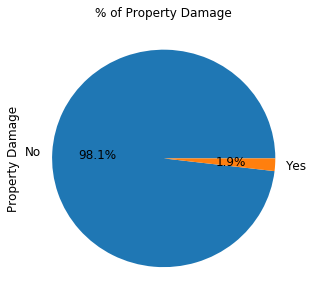

In [93]:
ax = (data['Property Damage'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%',labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Property Damage',fontsize = 12)
ax.set_title('% of Property Damage', fontsize = 12)
plt.show()

In [32]:
X=data.drop(['Property Damage','Date Of Stop_format'],1)
Y=data['Property Damage']

In [33]:
### Dataset is imbalanced

#### Using Synthetic Minority Oversampling Technique to balance the dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_res, y_res=sm.fit_sample(X,Y)

In [34]:
X_res=pd.DataFrame(X_res,columns=X.columns)
y_res=pd.DataFrame(y_res,columns=['Property Damage'])

In [35]:
data1=pd.DataFrame()
data1=pd.concat([data1,X_res],axis=1)
data1=pd.concat([data1,y_res],axis=1)

#### Phi coefficient after SMOTE

In [28]:
data1.columns

Index(['SubAgency', 'Accident', 'Belts', 'Personal Injury', 'Fatal',
       'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol',
       'Work Zone', 'VehicleType', 'Violation Type', 'Contributed To Accident',
       'Race', 'Gender', 'year_vio', 'month_vio', 'day_vio', 'Hour_vio',
       'day_of_week', 'season', 'Property Damage'],
      dtype='object')

In [36]:
for i in X_res.columns:
    print('phi for {}'.format(i),round(metrics.matthews_corrcoef(X_res[i],y_res['Property Damage'], sample_weight=None),2))

phi for SubAgency -0.0
phi for Accident 0.34
phi for Belts 0.01
phi for Personal Injury -0.08
phi for Fatal -0.01
phi for Commercial License -0.04
phi for HAZMAT -0.01
phi for Commercial Vehicle -0.04
phi for Alcohol 0.03
phi for Work Zone -0.01
phi for VehicleType -0.0
phi for Violation Type -0.26
phi for Contributed To Accident 0.34
phi for Race 0.01
phi for Gender -0.12
phi for year_vio 0.0
phi for month_vio 0.0
phi for day_vio 0.0
phi for Hour_vio 0.01
phi for day_of_week -0.07
phi for season -0.03


# Model Building

## Spliting Test Train data 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=100)

## 1.Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,log_loss,roc_curve,roc_auc_score
from sklearn.metrics import auc,roc_curve,make_scorer,f1_score

In [40]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred_lg= lg.predict(X_test)

lg_score_train = lg.score(X_train,y_train)
print("Train Prediction Score for logistic regression",round(lg_score_train*100,2))
lg_score_test = accuracy_score(y_test,y_pred_lg)
print("Test Prediction Score for logistic regression",round(lg_score_test*100,2))
print()
print('Confussion matrix:\n',confusion_matrix(y_test, y_pred_lg))
print()
print("Test Precision Score for logistic regression",round(precision_score(y_test,y_pred_lg),2))

Train Prediction Score for logistic regression 76.42
Test Prediction Score for logistic regression 76.38

Confussion matrix:
 [[29171 17259]
 [ 4741 41960]]

Test Precision Score for logistic regression 0.71


In [41]:
print("Test Precision Score for logistic regression",round(precision_score(y_test,y_pred_lg),2))

Test Precision Score for logistic regression 0.71


#### ROC_Curve_logistic regression

[[0.95689006 0.04310994]
 [0.26191403 0.73808597]
 [0.43781344 0.56218656]
 ...
 [0.46910852 0.53089148]
 [0.49507702 0.50492298]
 [0.45218354 0.54781646]]
AUC: 0.852


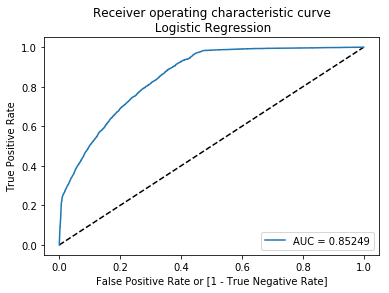

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = lg.predict_proba(X_test)
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve\n Logistic Regression')

# show the plot
plt.show()

In [64]:
coeff=pd.DataFrame(lg.coef_.T,columns=['coefficient'])
coeff

,coefficient
0,-0.011759
1,1.505550
2,-0.021974
3,-7.964945
4,-2.262662
5,-0.726956
6,0.047440
7,-2.065013
8,0.269910
9,-1.874590


In [63]:
feature_log=pd.DataFrame(X_train.columns,columns=['Feature'])
feature_log=pd.concat([feature_log,coeff],1)
feature_log['oddsratio']=np.exp(feature_log['coefficient'])
feature_log['Probability']=feature_log['oddsratio']/(feature_log['oddsratio']+1)*100
feature_log.sort_values(by='Probability',ascending=False)

,Feature,coefficient,oddsratio,Probability
1,Accident,1.505550,4.506629,81.840071
12,Contributed To Accident,1.505550,4.506629,81.840071
8,Alcohol,0.269910,1.309846,56.707074
6,HAZMAT,0.047440,1.048583,51.185779
16,month_vio,0.018370,1.018540,50.459239
15,year_vio,0.000874,1.000875,50.021858
10,VehicleType,-0.003913,0.996094,49.902163
18,Hour_vio,-0.008103,0.991930,49.797434
17,day_vio,-0.008543,0.991493,49.786422
0,SubAgency,-0.011759,0.988309,49.706018


## 2.Decission Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
DT=DecisionTreeClassifier()

In [38]:
DT.fit(X_train,y_train)
y_pred_dt=DT.predict(X_test)

In [39]:
dt_score_train = DT.score(X_train,y_train)
print("Train Prediction Score for Decission Tree",round(dt_score_train*100,2))
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score for Decission Tree",round(dt_score_test*100,2))
print()
print('Confussion matrix:\n',confusion_matrix(y_test, y_pred_dt))
print()
print("Test Precision Score for Decission Tree",round(precision_score(y_test,y_pred_dt)))

Train Prediction Score for Decission Tree 99.95
Test Prediction Score for Decission Tree 97.14

Confussion matrix:
 [[44203  2227]
 [  441 46260]]

Test Precision Score for Decission Tree 1.0


#### ROC_Curve_Decision Tree

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
AUC: 0.972


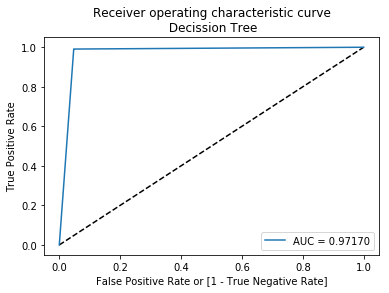

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = DT.predict_proba(X_test)
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve\n Decission Tree')

# show the plot
plt.show()

## 3.Random Forest

In [41]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [48]:
# Random Forest model
RF = RandomForestClassifier()  
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test) 
RF_score_test=metrics.accuracy_score(y_test,y_pred_RF)
RF_score_train=RF.score(X_train,y_train)

print("Test Accuracy for Randomforest:\t",round(RF_score_test,3))
print()
print("Train Accuracy for Randomforest:",round(RF_score_train,3))
print()
print('Confussion Matrix:\n',metrics.confusion_matrix(y_pred_RF,y_test))
print()
print("Test precision score for Randomforest:\t",round(precision_score(y_test,y_pred_RF),3))


Test Accuracy for Randomforest:	 0.985

Train Accuracy for Randomforest: 0.999

Confussion Matrix:
 [[45426   357]
 [ 1004 46344]]

Test precision score for Randomforest:	 0.979


In [49]:
# Classification report
expected = y_test
predicted = RF.predict(X_test)
from sklearn.metrics import classification_report
class_report = classification_report(expected,predicted,target_names=['No','Yes'])
print(class_report)

              precision    recall  f1-score   support

          No       0.99      0.98      0.99     46430
         Yes       0.98      0.99      0.99     46701

    accuracy                           0.99     93131
   macro avg       0.99      0.99      0.99     93131
weighted avg       0.99      0.99      0.99     93131



AUC: 0.997


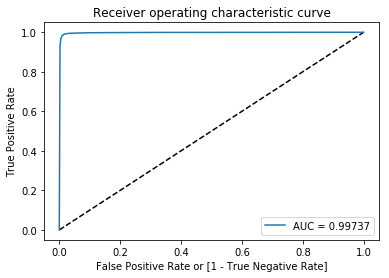

In [50]:
# predict probabilities
probs = RF.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

## Model Comparison of three base models

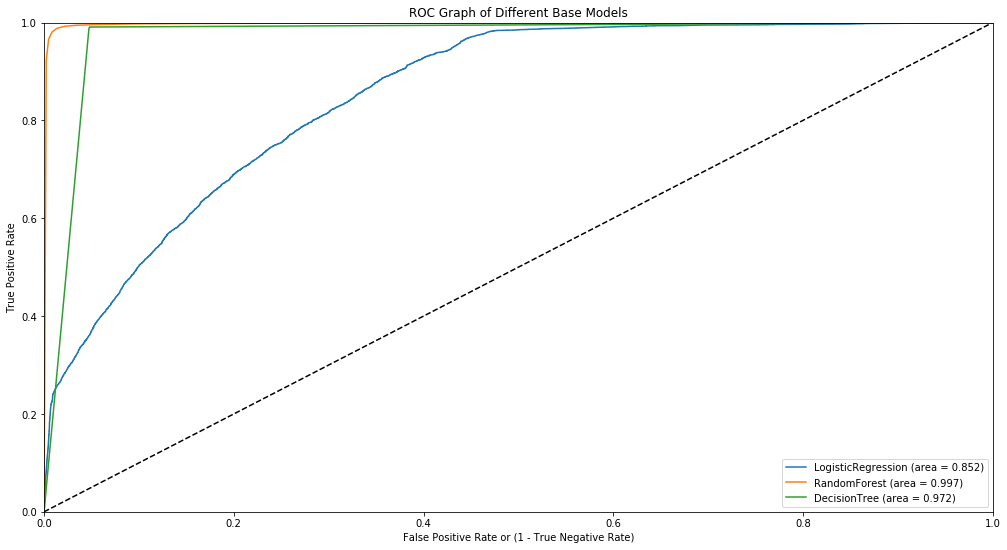

In [51]:
# Create ROC Graph
from sklearn.metrics import roc_curve
plt.figure(figsize=(17,9))

fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])



auc_lg = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, RF.predict_proba(X_test)[:,1])
auc_dt = roc_auc_score(y_test, DT.predict_proba(X_test)[:,1])


# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='LogisticRegression (area = %0.3f)' % auc_lg)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='RandomForest (area = %0.3f)' % auc_rf)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='DecisionTree (area = %0.3f)' % auc_dt)

# Plot Base Rate ROC
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - True Negative Rate)')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph of Different Base Models')
plt.legend(loc="lower right")
plt.show()

#### GridSearch for best params

In [44]:
# finding best hyperparameters for RandomForest
from sklearn.model_selection import GridSearchCV
RF= RandomForestClassifier()
parameter={'max_depth':np.arange(1,20),'criterion':['entropy','gini']}

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)

GS_RF=GridSearchCV(RF,parameter,cv=kf,scoring=make_scorer(f1_score,average='weighted'))
GS_RF.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                     

In [45]:
print("Best parameters:",GS_RF.best_params_)
print("Accuracy :",GS_RF.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 19}
Accuracy : 0.9034866270836295


In [46]:
# Random Forest model Regularised
rf = RandomForestClassifier(random_state=42,max_depth=19)  
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test) 
rf_score_test=metrics.accuracy_score(y_test,y_pred_rf)
rf_score_train=rf.score(X_train,y_train)

print("Test Accuracy for Randomforest_regularised:\t",round(rf_score_test,3))
print()
print("Train Accuracy for Randomforest_regularised:",round(rf_score_train,3))
print()
print('Confussion Matrix:\n',metrics.confusion_matrix(y_pred_rf,y_test))

Test Accuracy for Randomforest_regularised:	 0.905

Train Accuracy for Randomforest_regularised: 0.914

Confussion Matrix:
 [[38246   678]
 [ 8184 46023]]


In [253]:
# Classification report
expected = y_test
predicted = rf.predict(X_test)
from sklearn.metrics import classification_report
class_report = classification_report(expected,predicted,target_names=['No','Yes'])
print(class_report)

              precision    recall  f1-score   support

          No       0.98      0.83      0.90     46430
         Yes       0.85      0.99      0.91     46701

    accuracy                           0.91     93131
   macro avg       0.92      0.91      0.91     93131
weighted avg       0.92      0.91      0.91     93131



AUC: 0.973


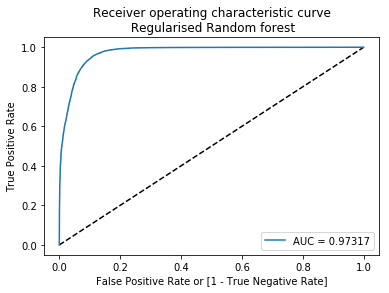

In [262]:
# predict probabilities
probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve\n Regularised Random forest')

# show the plot
plt.show()

In [82]:
feat_importance = rf.feature_importances_

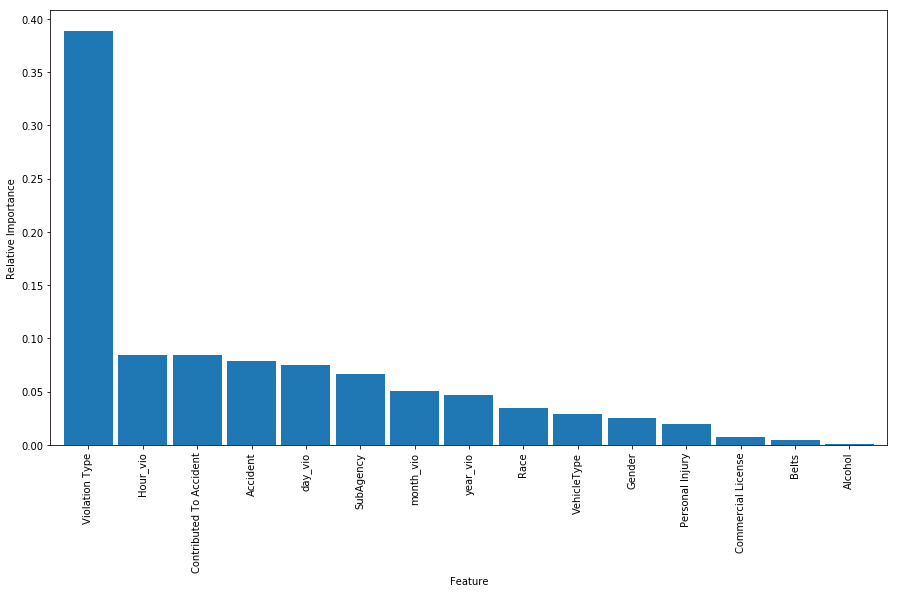

In [83]:
r = pd.DataFrame(columns=['Feature','Importance'])
ncomp = 15
r['Feature'] = feat_labels = X_train.columns
r['Importance'] = rf.feature_importances_
r.set_index(r['Feature'], inplace=True)
ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
ax.set_ylabel('Relative Importance')
plt.show()

# Ensemble Methods

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import auc,roc_curve,make_scorer
from sklearn import metrics

### Gradient Boosting

In [276]:
from sklearn.ensemble import GradientBoostingClassifier
gboo =GradientBoostingClassifier(n_estimators=100,random_state=100)
gboo.fit(X_train,y_train)

y_pred_gboo= gboo.predict(X_test)

#Score of Prediction
gboo_score_train = gboo.score(X_train,y_train)
print("Train Prediction Score Gradient boost",gboo_score_train*100)

gboo_score_test = accuracy_score(y_test,y_pred_gboo)
print("Test Prediction Score gradient boost",gboo_score_test*100)

confusion_matrix(y_test, y_pred_gboo)

Train Prediction Score 81.06330791567534
Test Prediction Score 80.88391620405665


array([[32707, 13723],
       [ 4080, 42621]], dtype=int64)

AUC: 0.895


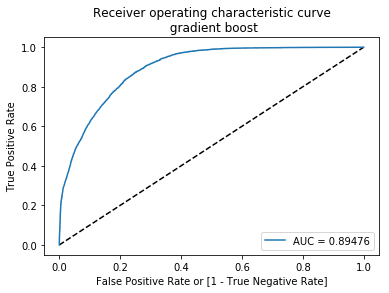

In [277]:
# predict probabilities
probs = gboo.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve\n gradient boost')

# show the plot
plt.show()

## XG Boost

In [78]:
from xgboost import XGBClassifier

In [280]:
xg=XGBClassifier(max_depth=15)

In [281]:
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)

In [293]:
#Score of Prediction
xg_score_train = xg.score(X_train,y_train)
print("Train Prediction Score for XG boost",round(xg_score_train,2))

xg_score_test = accuracy_score(y_test,y_pred_xg)
print("Test Prediction Score for XG Boost",round(xg_score_test,2))

confusion_matrix(y_test, y_pred_xg)

print("Test precission score for XG Boost",round(precision_score(y_test,y_pred_xg),2))

Train Prediction Score for XG boost 97.81
Test Prediction Score for XG Boost 96.37
Test precission score for XG Boost 0.94


AUC: 0.994


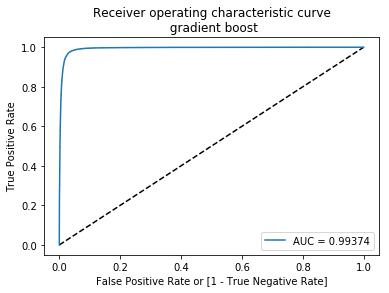

In [299]:
# predict probabilities
probs = xg.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve\n gradient boost')

# show the plot
plt.show()

# Ada Boost

In [155]:
from sklearn.ensemble import AdaBoostClassifier

In [295]:
ad_rf=AdaBoostClassifier(base_estimator=rf)

In [296]:
ad_rf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=19,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                           

In [297]:
y_pred_adb=ad_rf.predict(X_test)

In [298]:
#Score of Prediction
ad_score_train = ad_rf.score(X_train,y_train)
print("Train Prediction Score",round(ad_score_train,2))

ad_score_test = accuracy_score(y_test,y_pred_xg)
print("Test Prediction Score",round(ad_score_test,2))

confusion_matrix(y_test, y_pred_adb)

Train Prediction Score 1.0
Test Prediction Score 0.96


array([[45859,   571],
       [  239, 46462]], dtype=int64)

AUC: 0.999


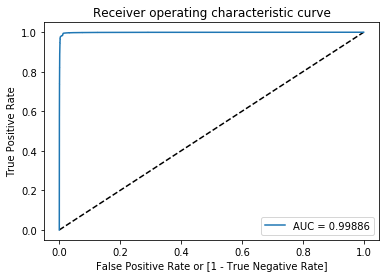

In [161]:
# predict probabilities
probs = ad_rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

### Model Comparison

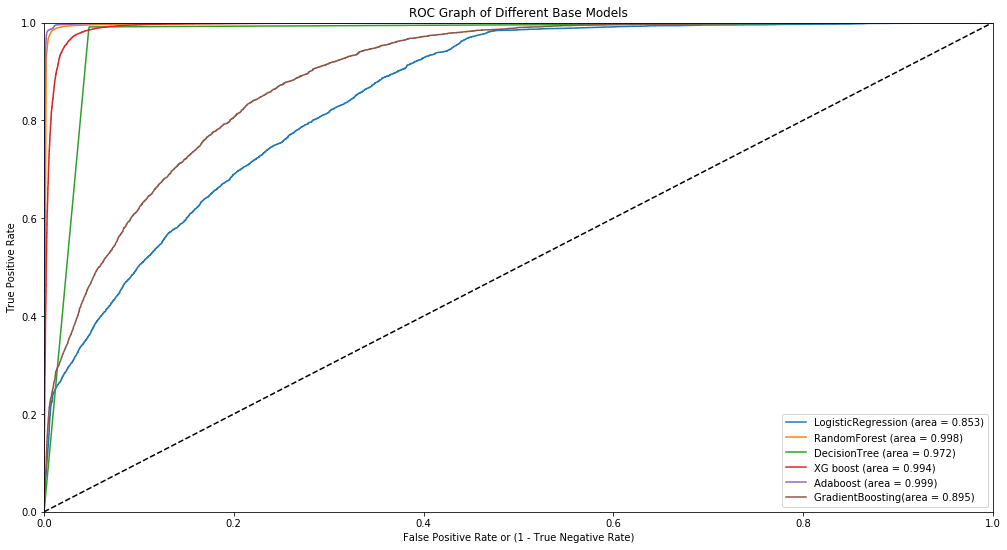

In [301]:
# Create ROC Graph
from sklearn.metrics import roc_curve
plt.figure(figsize=(17,9))

fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
gboo_fpr, gboo_tpr, gboo_thresholds = roc_curve(y_test, gboo.predict_proba(X_test)[:,1])
xg_fpr, xg_tpr, xg_thresholds = roc_curve(y_test, xg.predict_proba(X_test)[:,1])
adb_fpr, adb_tpr, adb_thresholds = roc_curve(y_test, ad_rf.predict_proba(X_test)[:,1])


auc_lg = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, RF.predict_proba(X_test)[:,1])
auc_dt = roc_auc_score(y_test, DT.predict_proba(X_test)[:,1])
auc_xg = roc_auc_score(y_test, xg.predict_proba(X_test)[:,1])
auc_gboo = roc_auc_score(y_test, gboo.predict_proba(X_test)[:,1])
auc_adb = roc_auc_score(y_test, ad_rf.predict_proba(X_test)[:,1])

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='LogisticRegression (area = %0.3f)' % auc_lg)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='RandomForest (area = %0.3f)' % auc_rf)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='DecisionTree (area = %0.3f)' % auc_dt)

# Plot Naive bayes ROC
plt.plot(xg_fpr,xg_tpr, label='XG boost (area = %0.3f)' % auc_xg)

# Plot Naive bayes ROC
plt.plot(adb_fpr, adb_tpr, label='Adaboost (area = %0.3f)' % auc_adb)

# Plot Gradient Boosting ROC
plt.plot(gboo_fpr, gboo_tpr, label='GradientBoosting(area = %0.3f)' % auc_gboo)

# Plot Base Rate ROC
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - True Negative Rate)')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph of Different Base Models')
plt.legend(loc="lower right")
plt.show()